In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_excel(r"C:\Users\user\Downloads\02 Churn-Dataset.xlsx")

In [3]:
df.drop(columns=['customerID','numAdminTickets','DeviceProtection','Dependents'], axis=1, inplace=True)

In [4]:
df.head(1)

,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numTechTickets,Churn
0,Female,0,Yes,1,No,No phone service,DSL,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,No


In [5]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = "coerce")
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype(int)

In [6]:
df["TotalCharges"].isnull().sum()

0

In [7]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [8]:
for col in df.select_dtypes(include=['float','int64']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

In [9]:
df.replace('No phone service', 'No', inplace=True)
df.replace('No internet service', 'No', inplace=True)

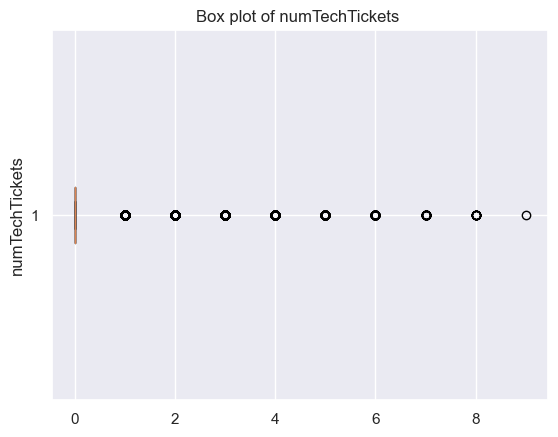

count    7043.000000
mean        0.419566
std         1.250117
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: numTechTickets, dtype: float64 



In [10]:
import matplotlib.pyplot as plt

plt.boxplot(df['numTechTickets'],vert=False)
plt.title('Box plot of numTechTickets ')
plt.ylabel('numTechTickets')
plt.show()
print(df.numTechTickets .describe(),'\n')

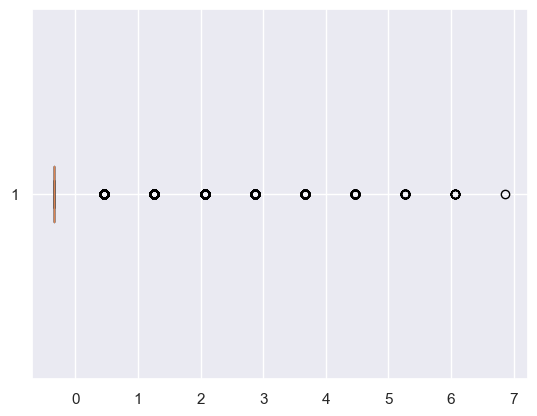

In [11]:
from scipy import stats

# Calculate Z-score for customer_age column
z_scores = stats.zscore(df['numTechTickets'])
plt.boxplot(z_scores,vert=False)

# Reatin rows with Z-score greater than -3 or less than +3
df = df[(z_scores >= -3) & (z_scores <= 3)]

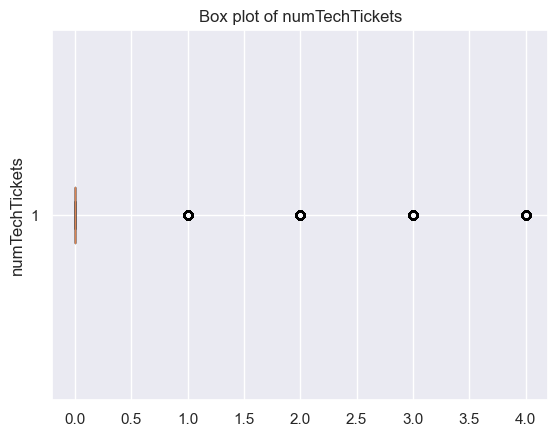

count    6814.000000
mean        0.241121
std         0.780546
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: numTechTickets, dtype: float64 



In [12]:
plt.boxplot(df['numTechTickets'],vert=False)
plt.title('Box plot of numTechTickets')
plt.ylabel('numTechTickets')
plt.show()
print(df.numTechTickets.describe(),'\n')

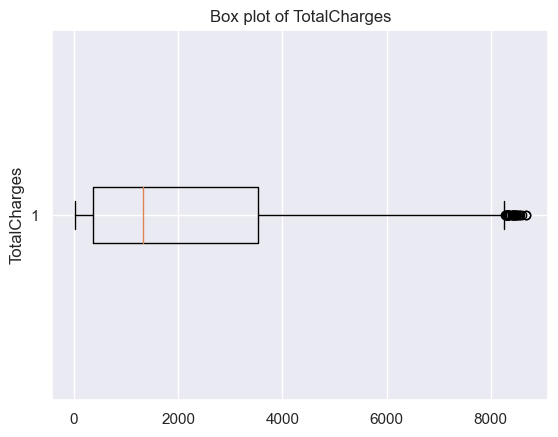

count    6814.000000
mean     2176.729968
std      2203.781971
min        18.000000
25%       374.000000
50%      1329.000000
75%      3531.250000
max      8672.000000
Name: TotalCharges, dtype: float64 



In [13]:
plt.boxplot(df['TotalCharges'],vert=False)
plt.title('Box plot of TotalCharges')
plt.ylabel('TotalCharges')
plt.show()
print(df.TotalCharges.describe(),'\n')

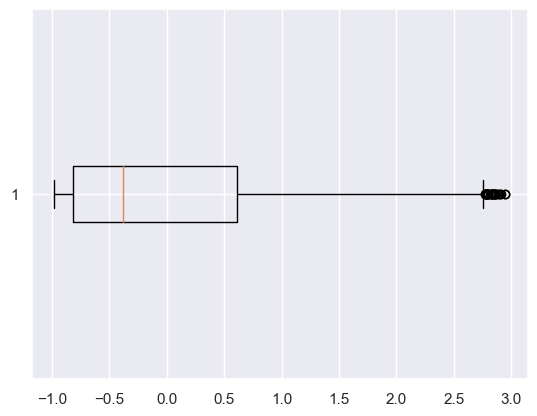

In [14]:
from scipy import stats

# Calculate Z-score for customer_age column
z_scores = stats.zscore(df['TotalCharges'])
plt.boxplot(z_scores,vert=False)

# Reatin rows with Z-score greater than -3 or less than +3
df = df[(z_scores >= -3) & (z_scores <= 3)]

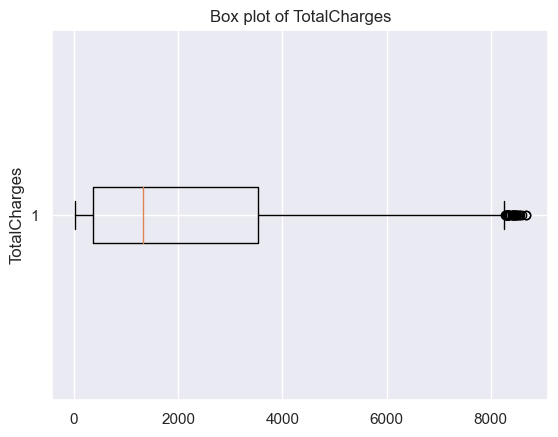

count    6814.000000
mean     2176.729968
std      2203.781971
min        18.000000
25%       374.000000
50%      1329.000000
75%      3531.250000
max      8672.000000
Name: TotalCharges, dtype: float64 



In [15]:
plt.boxplot(df['TotalCharges'],vert=False)
plt.title('Box plot of TotalCharges')
plt.ylabel('TotalCharges')
plt.show()
print(df.TotalCharges.describe(),'\n')

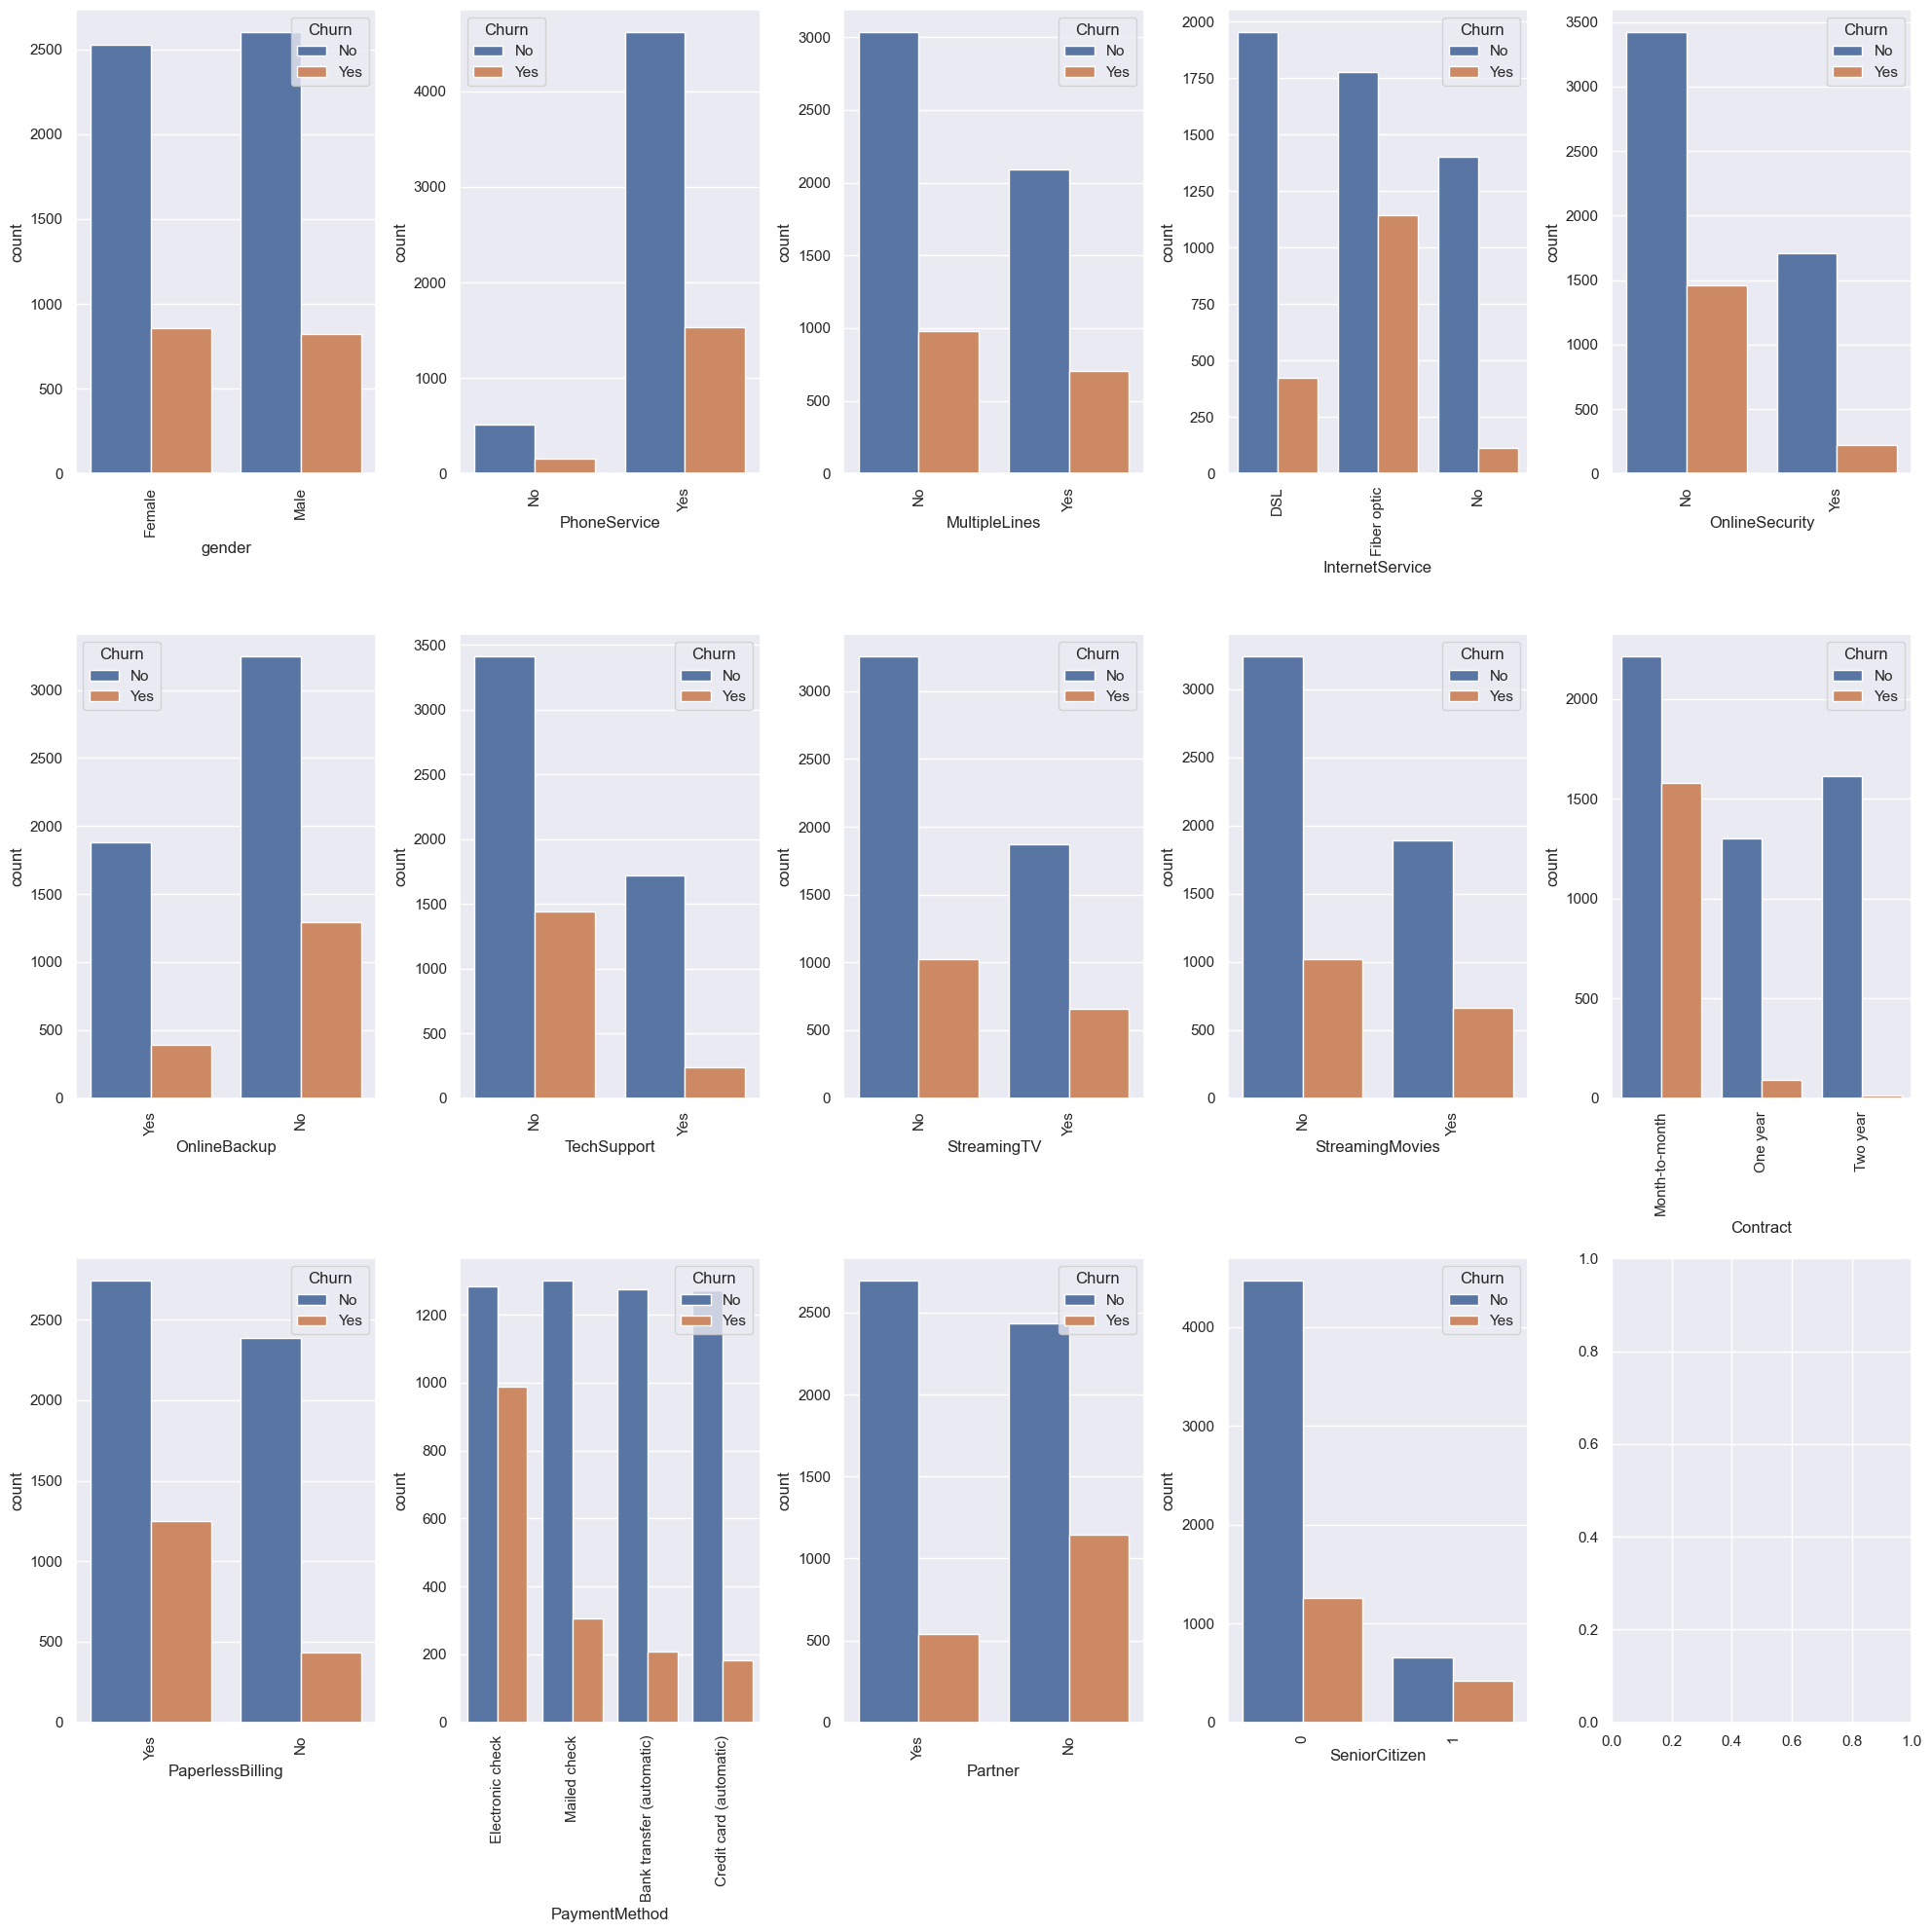

In [16]:
cat_var = ["gender",
                   "PhoneService", "MultipleLines", "InternetService",
                   "OnlineSecurity", "OnlineBackup",
                   "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
                   "PaperlessBilling", "PaymentMethod","Partner", "SeniorCitizen"]


fig, axis= plt.subplots(nrows=3, ncols=5, figsize=(20, 20))
axis = axis.flatten()

for i, var in enumerate(cat_var):
    sns.countplot(x=var, hue='Churn', data=df, ax=axis[i])
    ax=axis[i].set_xticklabels(axis[i].get_xticklabels(), rotation=90)
fig.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_14216\1756747458.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[i].set_xticklabels(axis[i].get_xticklabels(), rotation=90)
C:\Users\user\AppData\Local\Temp\ipykernel_14216\1756747458.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[i].set_xticklabels(axis[i].get_xticklabels(), rotation=90)
C:\Users\user\AppData\Local\Temp\ipykernel_14216\1756747458.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[i].set_xticklabels(axis[i].get_xticklabels(), rotation=90)
C:\Users\user\AppData\Local\Temp\ipykernel_14216\1756747458.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[i].set_xticklabels(axis[i].get_xticklabels(), rotation=90)
C:\Users\user\AppData\Local\Temp\ipykernel_14216\1756747458.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[i].set_xticklabels(

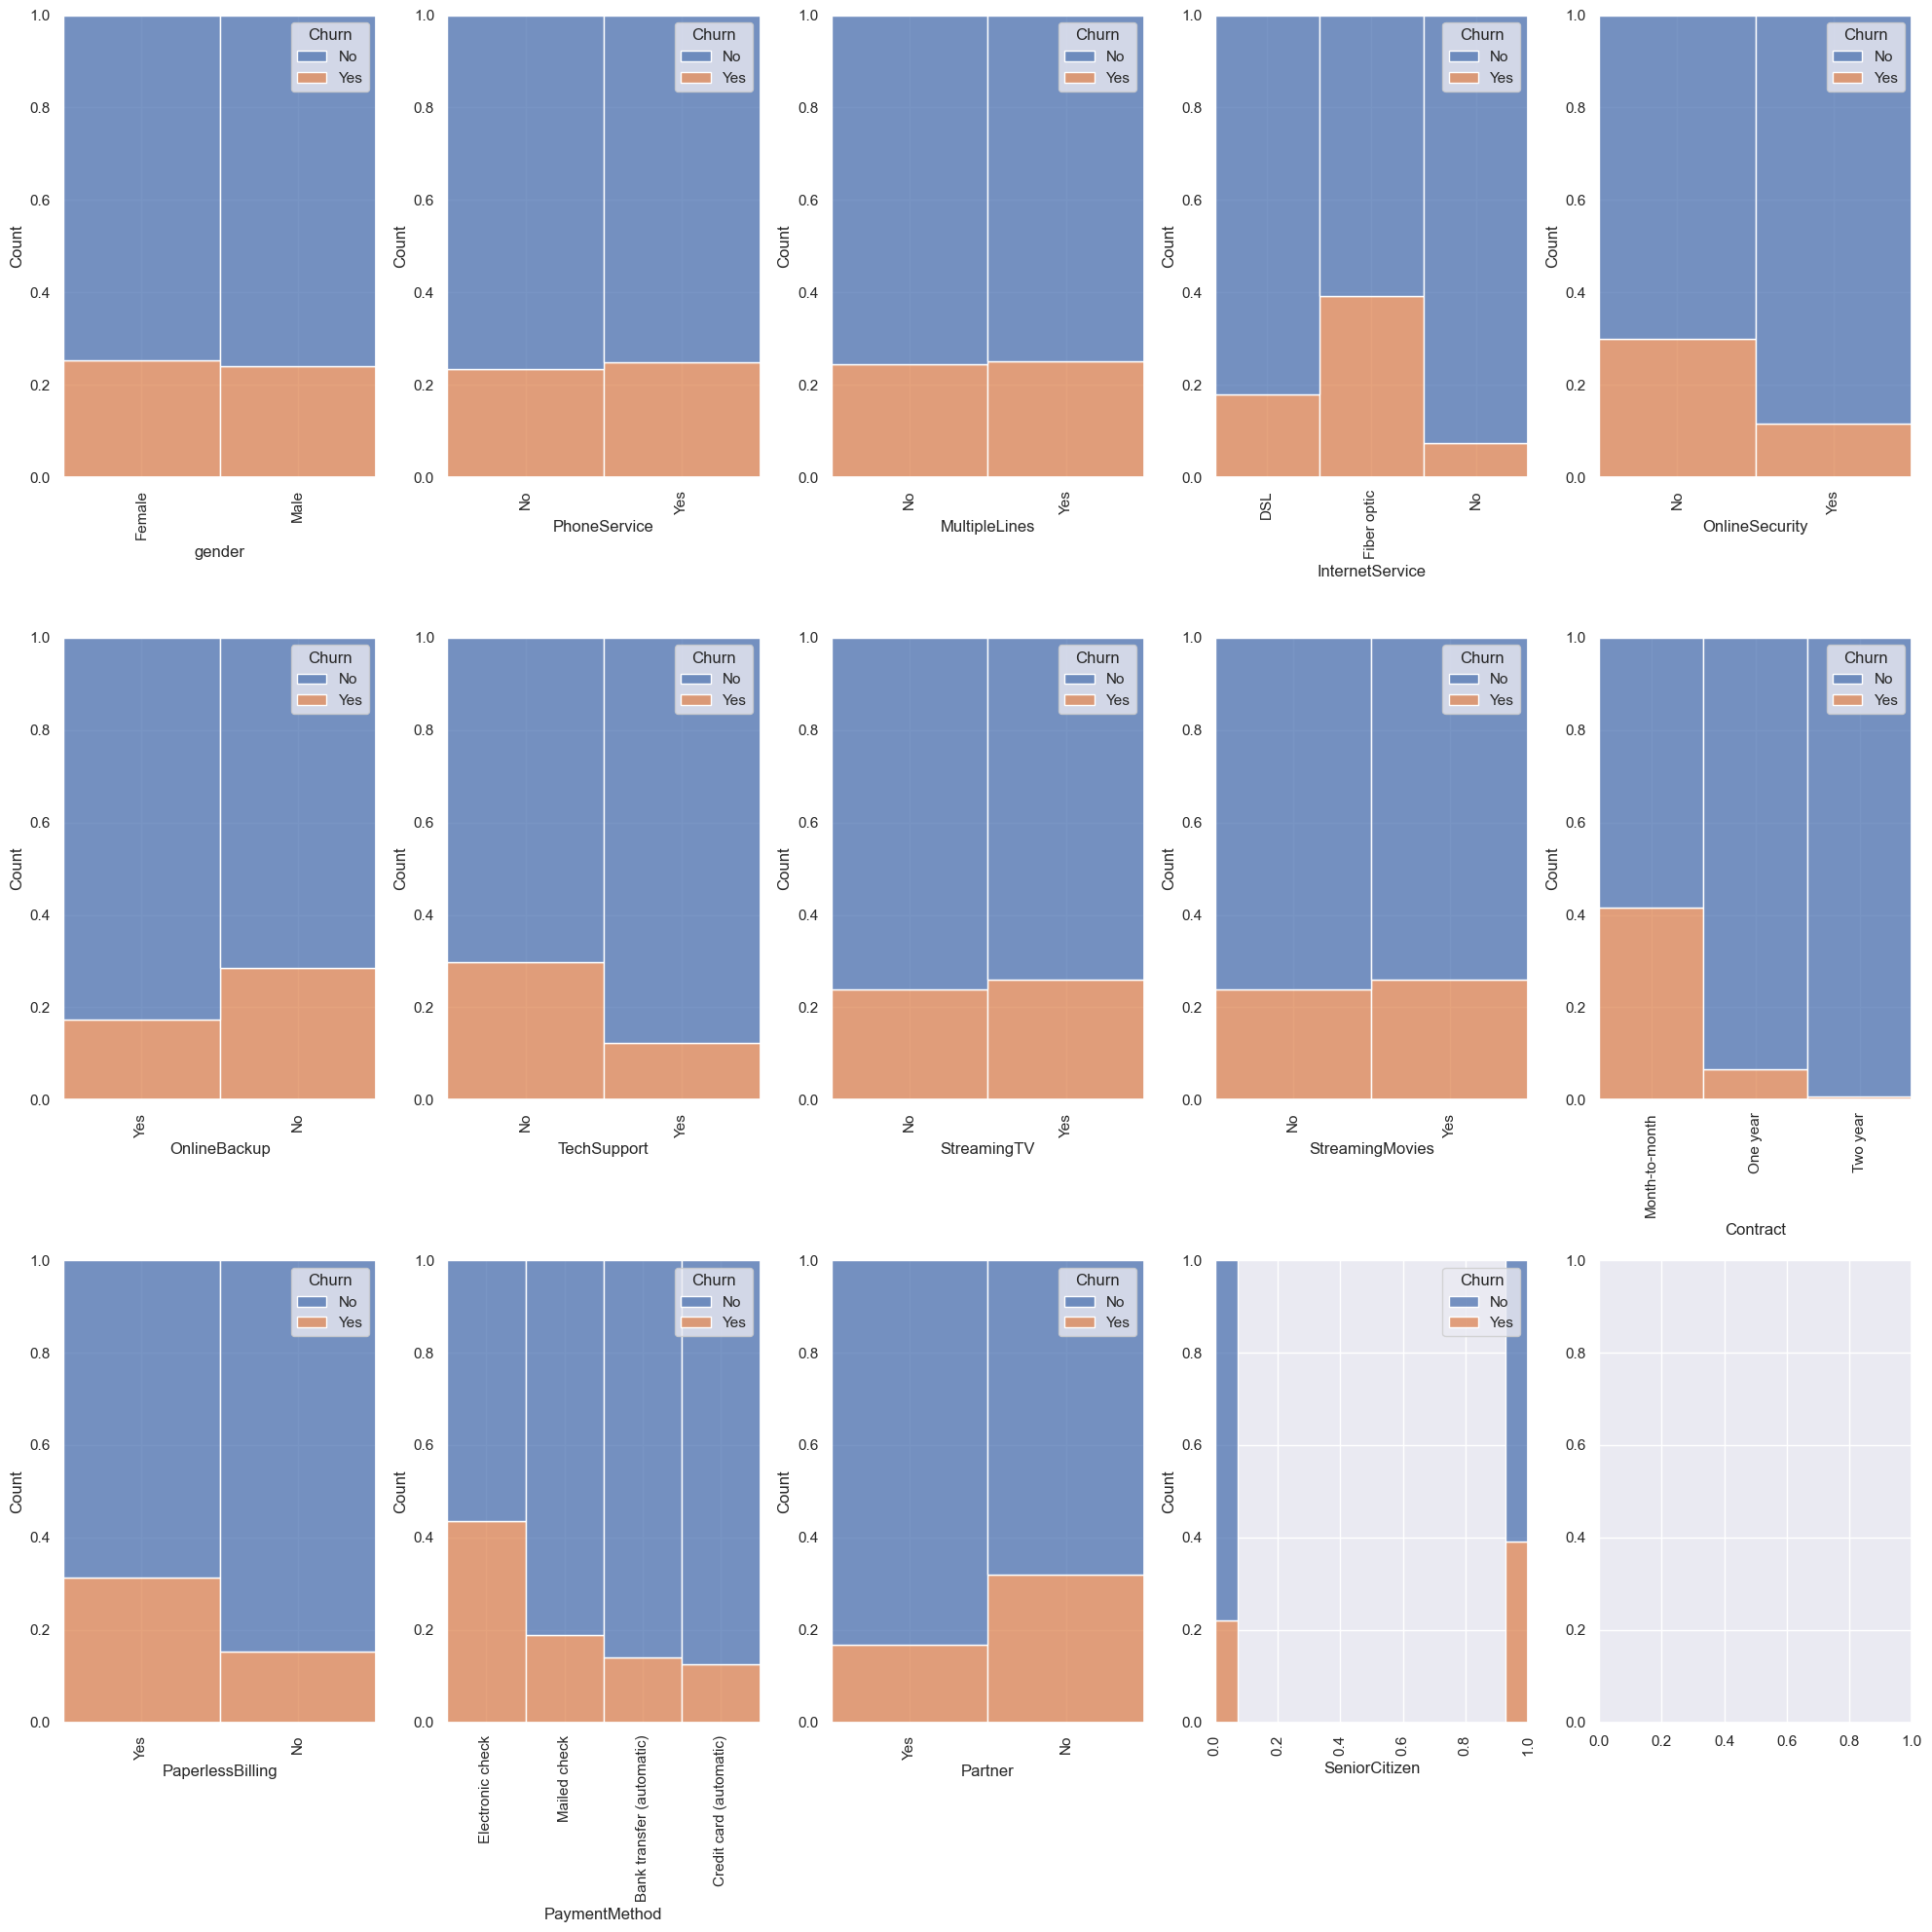

In [17]:
cat_var = ["gender",
                   "PhoneService", "MultipleLines", "InternetService",
                   "OnlineSecurity", "OnlineBackup",
                   "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
                   "PaperlessBilling", "PaymentMethod","Partner", "SeniorCitizen"]


fig, axis= plt.subplots(nrows=3, ncols=5, figsize=(20, 20))
axis = axis.flatten()

for i, var in enumerate(cat_var):
    sns.histplot(x=var, hue='Churn', data=df, ax=axis[i], multiple='fill', kde=False, element='bars')
    axis[i].set_xticklabels(axis[i].get_xticklabels(), rotation=90)
    axis[i].set_xlabel(var)
fig.tight_layout()
plt.show()

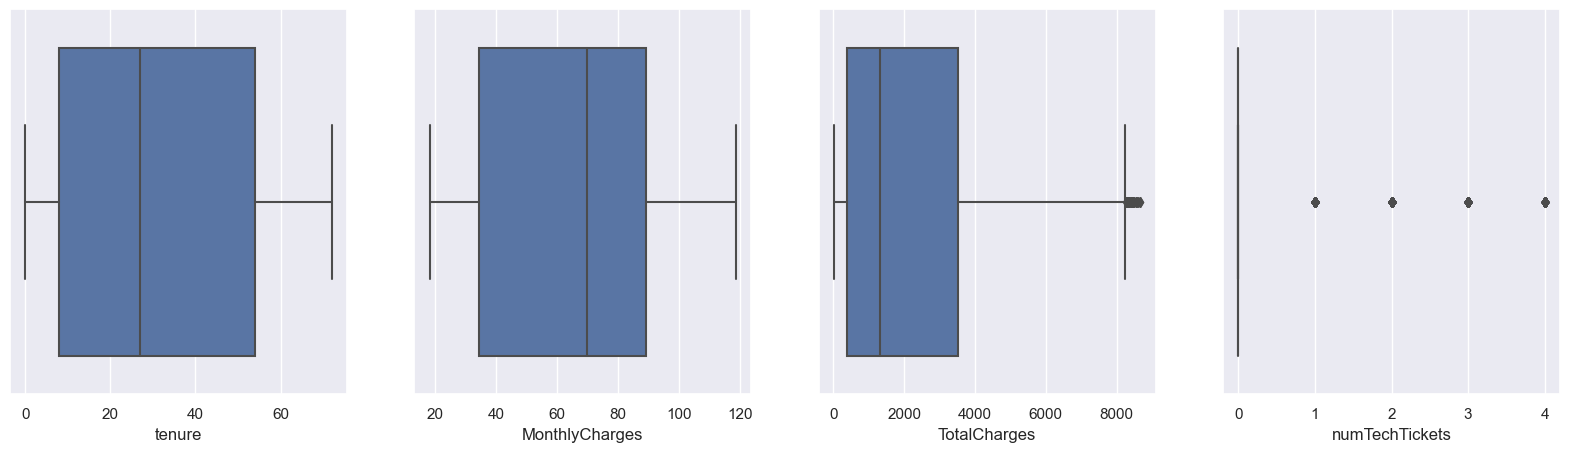

In [18]:
num_var = ['tenure', 'MonthlyCharges', 'TotalCharges', 'numTechTickets']

fig, axis= plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
axis = axis.flatten()

for i, var in enumerate(num_var):
    sns.boxplot(x=var, hue='Churn', data=df, ax=axis[i])

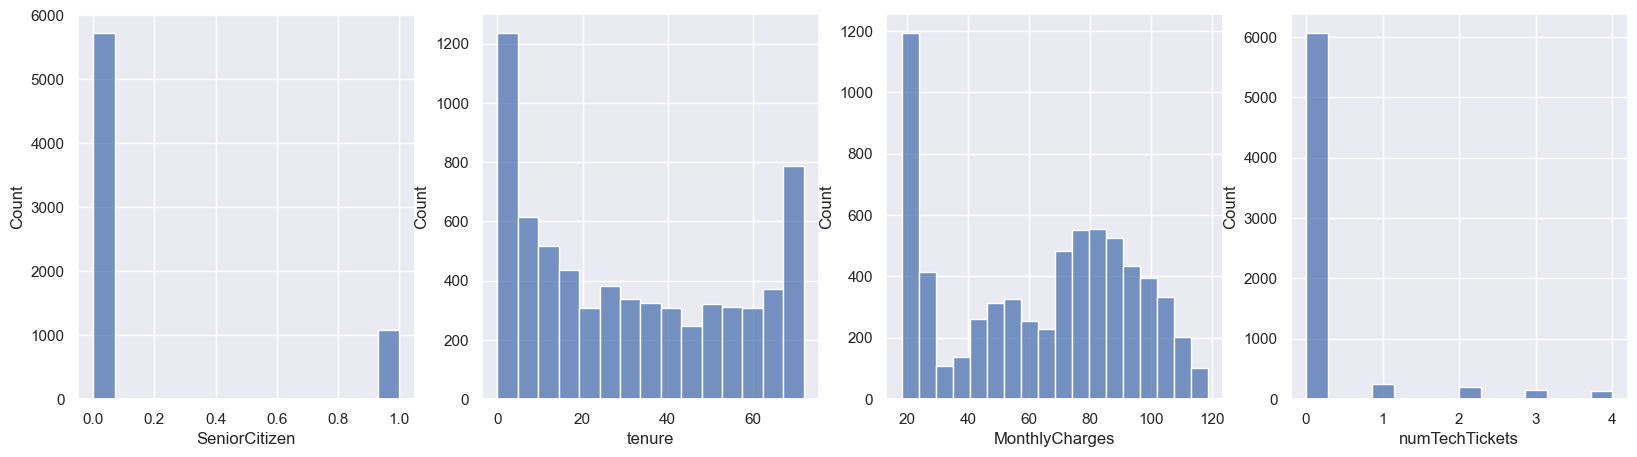

In [19]:
num_var = df.select_dtypes(include=['int64', 'float64']).columns

fig, axis= plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
axis = axis.flatten()

for i, var in enumerate(num_var):
    sns.histplot(x=var, data=df, ax=axis[i])

In [20]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [21]:
df.dtypes

gender               object
SeniorCitizen        object
Partner              object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges          int32
numTechTickets        int64
Churn                object
dtype: object

In [22]:
df = pd.get_dummies(df, drop_first=False)

C:\Users\user\AppData\Local\Temp\ipykernel_14216\3725349382.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df = pd.get_dummies(df, drop_first=False)


In [23]:
df.head(3)

,tenure,MonthlyCharges,TotalCharges,numTechTickets,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,1,29.85,29,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0
1,34,56.95,1889,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0
2,2,53.85,108,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1


In [24]:
from sklearn.preprocessing import StandardScaler
  
# Separate the dummy variables from the numerical variables
dummy_cols = df.select_dtypes(include='uint8').columns
num_cols = list(set(df.select_dtypes(include=['float64', 'int64', 'int32']).columns) - set(dummy_cols))

# Standardize the numerical variables
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Combine the standardized numerical variables with the dummy variables
df_std = pd.concat([df[num_cols], df[dummy_cols]], axis=1)

print(df_std.head(5),'\n')
print(df_std.describe(),'\n')

   MonthlyCharges    tenure  TotalCharges  numTechTickets  gender_Female  \
0       -1.138452 -1.249312     -0.974637       -0.308936              1   
1       -0.231746  0.104441     -0.130571       -0.308936              0   
2       -0.335465 -1.208289     -0.938787       -0.308936              0   
3       -0.721903  0.555693     -0.152808        3.534808              0   
4        0.228298 -1.208289     -0.919274       -0.308936              1   

   gender_Male  SeniorCitizen_0  SeniorCitizen_1  Partner_No  Partner_Yes  \
0            0                1                0           0            1   
1            1                1                0           1            0   
2            1                1                0           1            0   
3            1                1                0           1            0   
4            0                1                0           1            0   

   PhoneService_No  PhoneService_Yes  MultipleLines_No  MultipleLines_Yes  \
0  

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_std.drop(['Churn_Yes',
                                                                 'Churn_No'], axis=1), df['Churn_Yes'], test_size=0.2, random_state=50)

In [26]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
DT = DecisionTreeClassifier()

In [29]:
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
grid_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,5,7,10],
    'min_samples_split': range(2,10,1),
    'min_samples_leaf': range(2,10,1)
}

In [31]:
grid_search = GridSearchCV(DT, grid_params, cv=5, n_jobs= -1, verbose= 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [32]:
best_classifier = grid_search.best_estimator_
print(best_classifier,'\n')
y_pred = best_classifier.predict(X_test)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=3) 



In [33]:
print(round(accuracy_score(y_pred, y_test),3))

0.843


In [34]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[943  64]
 [150 206]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1007
           1       0.76      0.58      0.66       356

    accuracy                           0.84      1363
   macro avg       0.81      0.76      0.78      1363
weighted avg       0.84      0.84      0.84      1363



<Axes: >

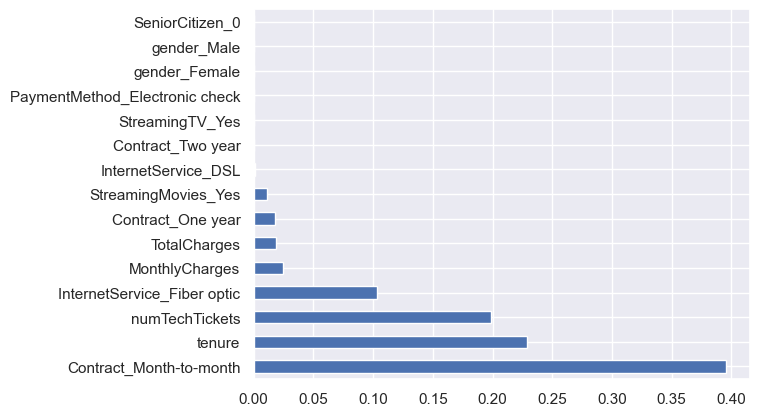

In [35]:
best_classifier.feature_importances_
feature_importances_best_classifier =pd.Series(best_classifier.feature_importances_, index=X_train.columns)
feature_importances_best_classifier.nlargest(15).plot(kind='barh')

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf = RandomForestClassifier(criterion='entropy',
    max_depth= 15,
    max_features= 'sqrt',
    min_samples_split= 2,
    min_samples_leaf= 10,
    n_estimators= 15)

In [38]:
rf = RandomForestClassifier()

In [39]:
param= {
    'n_estimators': [5, 10, 15, 20]
    ,'max_depth': [None, 2, 5, 10], 'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4], 'max_features': ['auto', 'sqrt', 'log2']
}

In [40]:
grid_search = GridSearchCV(rf, param, cv=5, n_jobs= -1, verbose= 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 10, 15, 20]},
             verbose=1)

In [41]:
best_classifier2 = grid_search.best_estimator_
print(best_classifier2,'\n')
y_pred1 = best_classifier2.predict(X_test)

RandomForestClassifier(max_depth=10, n_estimators=15) 



In [42]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1007
           1       0.74      0.63      0.68       356

    accuracy                           0.85      1363
   macro avg       0.81      0.78      0.79      1363
weighted avg       0.84      0.85      0.84      1363



In [43]:
print(confusion_matrix(y_test, y_pred1))

[[929  78]
 [130 226]]


<Axes: >

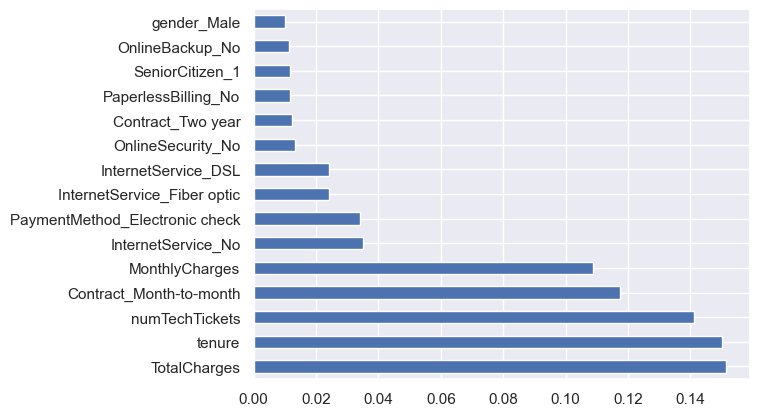

In [44]:
best_classifier2.feature_importances_
feature_importances_best_classifier =pd.Series(best_classifier2.feature_importances_, index=X_train.columns)
feature_importances_best_classifier.nlargest(15).plot(kind='barh')

In [45]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
y_pred1 = rf.predict(X_test)

In [47]:
print(round(accuracy_score(y_pred1, y_test),3))

0.855


In [48]:
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[937  70]
 [127 229]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1007
           1       0.77      0.64      0.70       356

    accuracy                           0.86      1363
   macro avg       0.82      0.79      0.80      1363
weighted avg       0.85      0.86      0.85      1363



<Axes: >

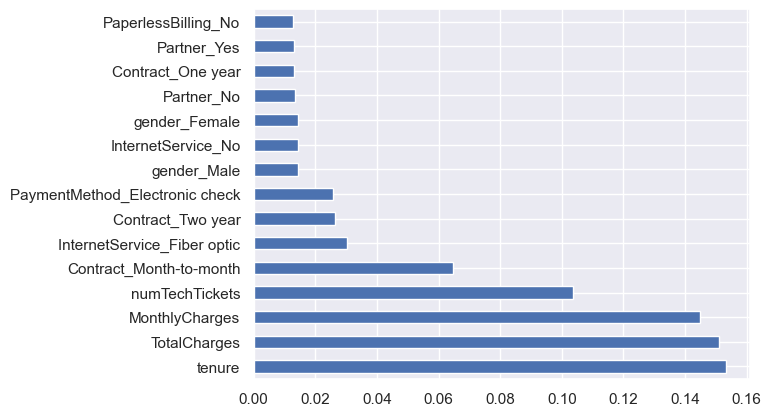

In [49]:
rf.feature_importances_
feature_importances_rf =pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances_rf.nlargest(15).plot(kind='barh')

In [50]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import RepeatedStratifiedKFold

In [51]:
classifier = svm.SVC()

In [52]:
hyperparameters = {'kernel': ['rbf'],
                   'C': [0.01, 0.1, 1, 10],
                   'gamma': [0.01, 0.001, 0.1, 1, 10, 100]
                  

                  }

In [53]:
grid_search2 = GridSearchCV(classifier, hyperparameters, cv=5, n_jobs= -1, verbose= 1)
grid_search2.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'gamma': [0.01, 0.001, 0.1, 1, 10, 100],
                         'kernel': ['rbf']},
             verbose=1)

In [54]:
best_classifier2 = grid_search2.best_estimator_
print(best_classifier2,'\n')
y_pred2 = best_classifier2.predict(X_test)

SVC(C=10, gamma=0.01) 



In [55]:
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
print(round(accuracy_score(y_test, y_pred2),3))

[[936  71]
 [127 229]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1007
           1       0.76      0.64      0.70       356

    accuracy                           0.85      1363
   macro avg       0.82      0.79      0.80      1363
weighted avg       0.85      0.85      0.85      1363

0.855


In [56]:
importance = np.abs(best_classifier2.coef_)
feature_names = X_train.columns

# sort the feature importance values in descending order
sorted_importance = sorted(zip(feature_names, importance[0]), key=lambda x: x[1], reverse=True)

# extract the sorted importance values and feature names
importance_values = [x[1] for x in sorted_importance]
feature_names = [x[0] for x in sorted_importance]

# plot the feature importance
import matplotlib.pyplot as plt
plt.barh(range(len(importance_values)), importance_values, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

AttributeError: coef_ is only available when using a linear kernel

In [57]:
!pip install scikeras
import scikeras as sk
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
#from scikeras.wrappers import KerasRegressor
#from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [58]:
# define model architecture
def create_model_classification(optimizer='adam'):
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# create the model
model = KerasClassifier(build_fn=create_model_classification, verbose=0)
print(model)

KerasClassifier(
	model=None
	build_fn=<function create_model_classification at 0x000001EC23B208B0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)


In [59]:
from sklearn.metrics import accuracy_score, make_scorer

# Define the scoring metric as accuracy
scorer = make_scorer(accuracy_score)

# Define the grid search parameters
param_grid = {'batch_size': [32, 64, 128],
              'epochs': [50, 100, 150],
              }

# Perform grid search to find the best hyperparameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring=scorer)
grid_result = grid.fit(X_train, y_train)

# Print the best parameters
print(f"Best Parameters: {grid_result.best_params_}")

C:\Users\user\anaconda2\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Best Parameters: {'batch_size': 128, 'epochs': 50}


In [60]:
best_model = grid.best_estimator_
best_model.fit(X_train, y_train, epochs=grid.best_params_['epochs'], batch_size=grid.best_params_['batch_size'], verbose=0, callbacks=[EarlyStopping(patience=10, restore_best_weights=True)])

y_pred3 = best_model.predict(X_test)

C:\Users\user\anaconda2\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred3))
print(round(accuracy_score(y_test, y_pred3),3))

[[936  71]
 [127 229]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1007
           1       0.76      0.69      0.72       356

    accuracy                           0.86      1363
   macro avg       0.83      0.80      0.81      1363
weighted avg       0.86      0.86      0.86      1363

0.861


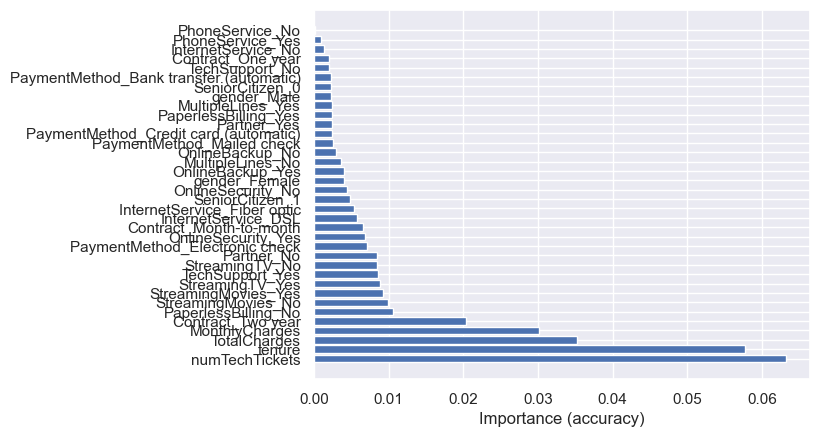

In [62]:
import numpy as np
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

def permutation_feature_importance(model, X, y, metric='accuracy', num_permutations=1000):
    baseline_score = model.score(X, y)
    feature_importances = []
    for feature in X.columns:
        X_permuted = X.copy()
        X_permuted[feature] = np.random.permutation(X_permuted[feature])
        permuted_score = model.score(X_permuted, y)
        feature_importances.append(baseline_score - permuted_score)
    sorted_importances = sorted(zip(feature_importances, X.columns), reverse=True)
    importances, features = zip(*sorted_importances)
    plt.barh(features, importances)
    plt.xlabel(f"Importance ({metric})")
    plt.show()

permutation_feature_importance(best_model, X_train, y_train)


In [69]:
models_acc = pd.DataFrame({ 'Models': ['DT', 'RF', 'SVC'],
                            'Accuracy_score':[round(accuracy_score(y_pred, y_test),3),
                                             round(accuracy_score(y_pred1, y_test),3),
                                             round(accuracy_score(y_pred2, y_test),3),
                                             
                                             
                                             ]})

In [70]:
models_acc

,Models,Accuracy_score
0,DT,0.843
1,RF,0.855
2,SVC,0.855


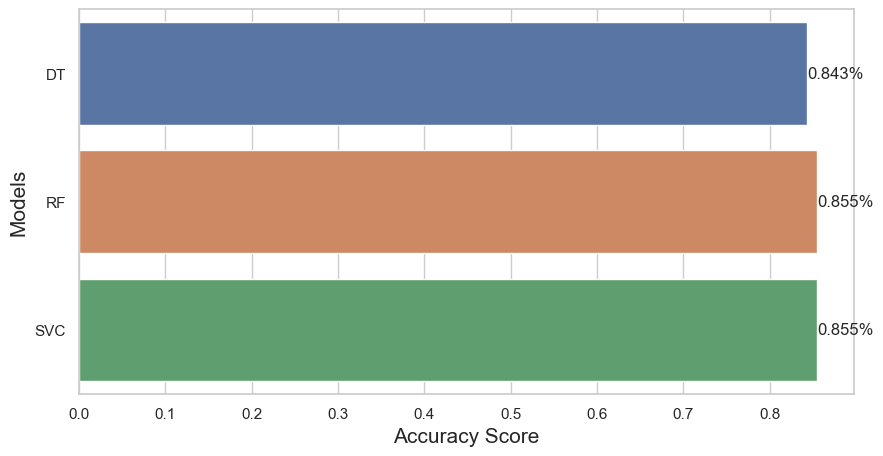

In [72]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
ax = sns.barplot(y ='Models', x='Accuracy_score', data=models_acc)
ax.set_xlabel('Accuracy Score', fontsize=15)
ax.set_ylabel('Models', fontsize=15)

for i in ax.containers:
    ax.bar_label(i, label_type='edge', labels=[f"{j.get_width()}%" for j in i])
    
plt.show()


In [ ]:
, 'model'
round(accuracy_score(y_pred3, y_test),3)